**Table of contents**<a id='toc0_'></a>    
- [Import statements](#toc1_1_)    
- [A basic line plot](#toc1_2_)    
- [**Text Functions**](#toc2_)    
    - [*Add a Centered Title to a Figure: The fig.suptitle() method (separate from Axes titles)*](#toc2_1_1_1_)    
    - [*Add a Title to an Axes: The ax.set_title() method*](#toc2_1_1_2_)    
    - [*Add label to the Axes's x and y axis: The ax.set_xlabel() and, ax.set_ylabel() methods*](#toc2_1_1_3_)    
    - [*Add Annotations: The ax.annotate() method*](#toc2_1_1_4_)    
- [**Legends** (Docs)   ](#toc3_)    
    - [*All the ways of creating and placing legends on an Axes*](#toc3_1_1_1_)    
    - [*Adding multiple legends on the same Axes*](#toc3_1_1_2_)    
    - [*Figure level legends: The fig.legend() method*](#toc3_1_1_3_)    
  - [*Creating artists specifically for adding to the legend (aka. Proxy artists)*](#toc3_2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=5
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

### <a id='toc1_1_'></a>[Import statements](#toc0_)

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

### <a id='toc1_2_'></a>[A basic line plot](#toc0_)

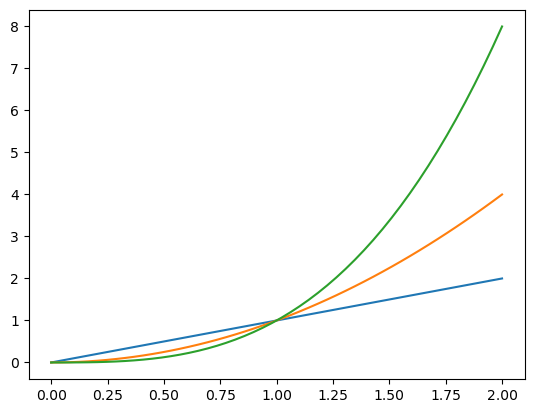

In [2]:
fig, ax = plt.subplots()
x = np.linspace(0, 2, 50)
line1, line2, line3 = ax.plot(x, x, x, x**2, x, x**3)
plt.show()

# Plot customization: Labelling Plots

## <a id='toc2_'></a>[**Text Functions**](#toc0_)

All of the text functions return a *matplotlib.text.Text* instance. You can customize the properties by passing keyword arguments into the text functions.

Here's a list of the basic Text commands --

<img src="./basic_text_commands.png">

All the available keyword arguments are listed @https://matplotlib.org/stable/tutorials/text/text_props.html. The *ax.set_title(), ax.set_xlabel(), ax.set_ylabel()* all are text functions and thus can be customized using some of these keyword arguments. Note that, all of these arguments are not accepted by all the functions. See the function documentation to see which ones are accepted.

**`Note:`** Matplotlib accepts TeX equation expressions in any text expression. 

-> You can write a TeX expression using the syntax, *$r'\$ TeX\ Expression \$'$* where the r signifies that the string is a raw string and the backslashes are not to be treated as python escape sequences. 

-> But before you do that you need to set, *`matplotlib.rcParams['text.usetex'] = True`*.

In [3]:
# be sure to add this before using TeX syntax in your code
mpl.rcParams["text.usetex"] = True

##### <a id='toc2_1_1_1_'></a>[*Add a Centered Title to a Figure: The fig.suptitle() method (separate from Axes titles)*](#toc0_)

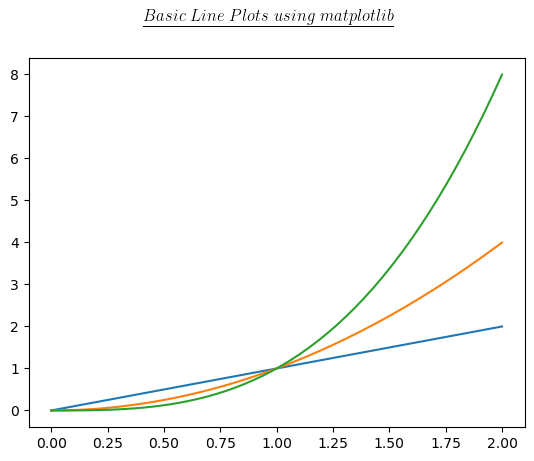

In [4]:
plt.sca(ax)
fig.suptitle(r"$\underline{Basic\ Line\ Plots\ using\ matplotlib}$")
plt.show()

##### <a id='toc2_1_1_2_'></a>[*Add a Title to an Axes: The ax.set_title() method*](#toc0_)

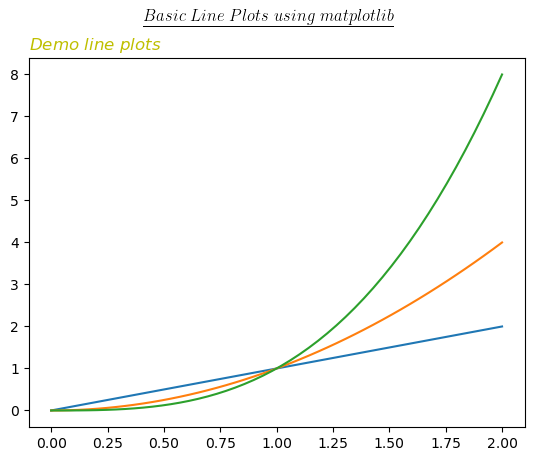

In [5]:
plt.sca(ax)
ax.set_title(r"$Demo\ line\ plots$", fontsize=12, fontweight=2, color="y", loc="left")
plt.show()

##### <a id='toc2_1_1_3_'></a>[*Add label to the Axes's x and y axis: The ax.set_xlabel() and, ax.set_ylabel() methods*](#toc0_)

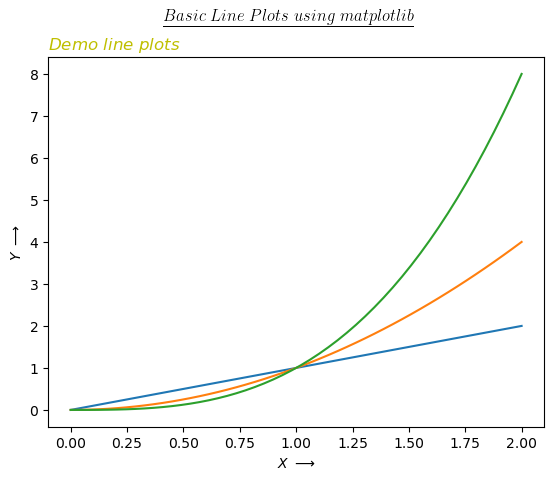

In [6]:
plt.sca(ax)

ax.set_xlabel(r"$X\ \longrightarrow$")
ax.set_ylabel(r"$Y\ \longrightarrow$")

plt.show()

##### <a id='toc2_1_1_4_'></a>[*Add Annotations: The ax.annotate() method*](#toc0_)

> The `ax.annotate(text, xy, xytext=None, arrowprops=None)` function is used for annotation

The annotated point is 'xy' and the annotation text is displayed in position 'xytext'. An arrow pointing from the text at position 'xytext' to the annotated point 'xy' can be added by defining arrowprops. If xytext=None then the text is placed at 'xy'.

- See the ax.annotate() function documentation @https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html
- Arrowstyles ([Documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.ArrowStyle.html#matplotlib.patches.ArrowStyle)) ([Visual examples](https://matplotlib.org/stable/gallery/text_labels_and_annotations/fancyarrow_demo.html))

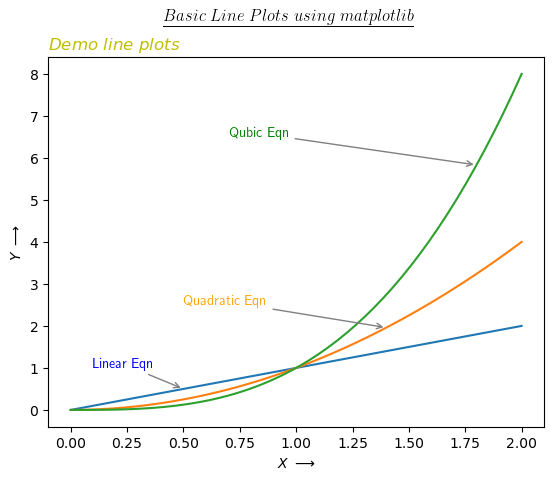

In [7]:
plt.sca(ax)

ax.annotate(
    "Linear Eqn",
    xy=(0.5, 0.5),
    xytext=(0.1, 1),
    arrowprops=dict(color="gray", arrowstyle="->"),
    color="blue",
)
ax.annotate(
    "Quadratic Eqn",
    xy=(1.4, 1.4**2),
    xytext=(0.5, 2.5),
    arrowprops=dict(color="gray", arrowstyle="->"),
    color="orange",
)
ax.annotate(
    "Qubic Eqn",
    xy=(1.8, 1.8**3),
    xytext=(0.7, 6.5),
    arrowprops=dict(color="gray", arrowstyle="->"),
    color="green",
)

plt.show()

## <a id='toc3_'></a>**Legends** ([Docs](https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html))    [&#8593;](#toc0_)

> To place legends on an Axes we use the `ax.legend(handles, labels, loc, bbox_to_anchor, **args, **kwargs)` function

<u>Function Properties</u>
- handles: A list of Artists (lines, patches) to be added to the legend.
- labels: A list of labels to show next to the artists.
- loc: The location of the legend. The strings 'upper left', 'upper right', 'lower left', 'lower right' place the legend at the corresponding corner of the axes. The strings 'upper center', 'lower center', 'center left', 'center right' place the legend at the center of the corresponding edge of the axes. The string 'center' places the legend at the center of the axes. The string 'best' places the legend at the location, among the nine locations defined so far, with the minimum overlap with other drawn artists. This option can be quite slow for plots with large amounts of data.
- bbox_to_anchor: Box that is used to position the legend in conjunction with loc. This argument allows arbitrary placement of the legend. Bbox coordinates are interpreted in the coordinate system given by *bbox_transform*, with the default transform Axes or Figure coordinates, depending on which legend is called. If a 4-tuple or BboxBase is given, then it specifies the bbox (x, y, width, height) that the legend is placed in. A 2-tuple (x, y) places the corner of the legend specified by loc at x, y.

**Note:** this function accepts a wide range of arguments which can be used to modify the position of the legend placement, legend font properties, color, legend markers and their properties and many other things. 

See the documentation @https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html#matplotlib.pyplot.legend for full details.

##### <a id='toc3_1_1_1_'></a>[*All the ways of creating and placing legends on an Axes*](#toc0_)

There are a number of ways to use this function to create and place legends on an axes.

- ***ax.legend()***: Automatic detection of elements (artists) to be shown in the legend and the labels are taken from the artists themselves. The artist labels can be set either at the time of artist creation or by calling the set_label() method on the artist e.g, *ax.plot([1, 2, 3], label='Inline label')* or, *line, = ax.plot([1, 2, 3]); line.set_label('Label via method')*. **Specific artists can be excluded from the automatic legend element selection by using a label starting with an underscore, "_".**

- ***ax.legend(handles)***: Explicitly listing only the artists. The labels are taken from the artists' label properties.

- ***ax.legend(labels)***: Listing only the artist lables. This call signature is discouraged, because the relation between plot elements i.e, artists and labels is only implicit by their order and can easily be mixed up.

- ***ax.legend(handles, labels)***: Explicitly listing the artists and the corresponding labels. E.g. *ax.legend([line1, line2, line3], ['label1', 'label2', 'label3'])*. For full control of which artists have a legend entry use this method.

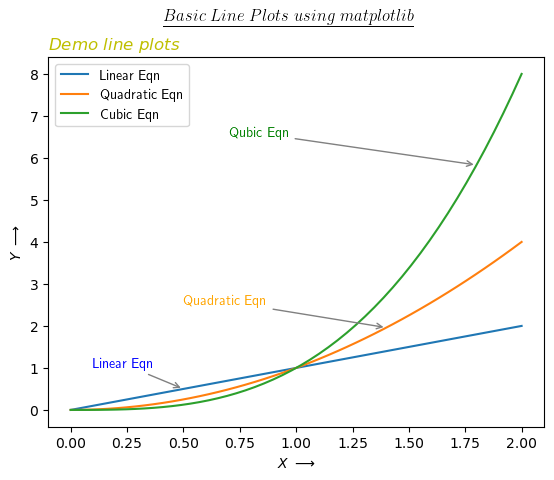

In [8]:
plt.sca(ax)

# This call signature is discouraged
ax.legend(labels=["Linear Eqn", "Quadratic Eqn", "Cubic Eqn"])

plt.show()

##### <a id='toc3_1_1_2_'></a>[*Adding multiple legends on the same Axes*](#toc0_)

*Sometimes it is more clear to split legend entries across multiple legends. Whilst the instinctive approach to doing this might be to call the legend() function multiple times, you will find that only one legend ever exists on the Axes. This has been done so that it is possible to call legend() repeatedly to update the legend to the latest handles on the Axes. To keep old legend instances, we must add them manually to the Axes with the `ax.add_artist()` method.*

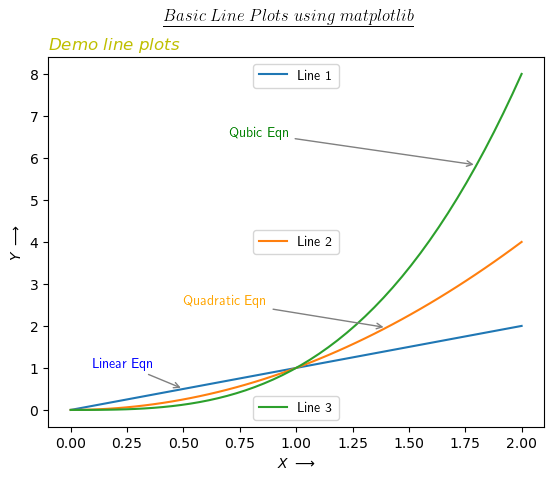

In [9]:
plt.sca(ax)

first_legend = ax.legend([line1], ["Line 1"], loc="upper center")
second_legend = ax.legend([line2], ["Line 2"], loc="center")

# manually adding the legend entries
ax.add_artist(first_legend)
ax.add_artist(second_legend)

ax.legend([line3], ["Line 3"], loc="lower center")

plt.show()

##### <a id='toc3_1_1_3_'></a>[*Figure level legends: The fig.legend() method*](#toc0_)

Sometimes it makes more sense to place a legend relative to the (sub)figure rather than individual Axes. ***By using constrained_layout and specifying "outside" at the beginning of the loc keyword argument (to the fig.legend method), the legend is drawn outside the Axes on the (sub)figure.***

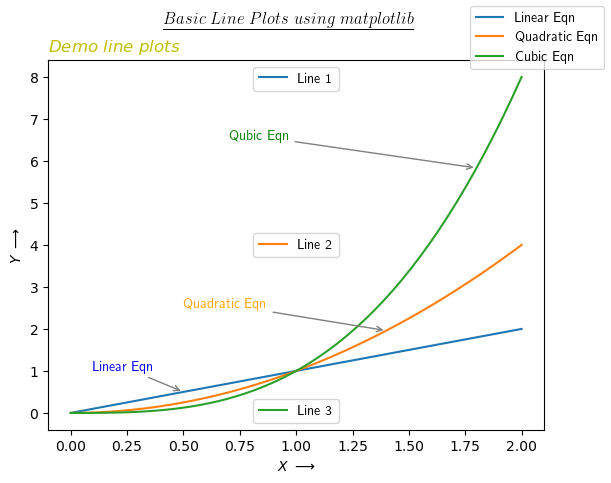

In [10]:
plt.sca(ax)

fig.legend(
    labels=["Linear Eqn", "Quadratic Eqn", "Cubic Eqn"], loc="outside upper right"
)

plt.show()

### <a id='toc3_2_'></a>[*Creating artists specifically for adding to the legend (aka. Proxy artists)*](#toc0_)

Not all handles can be turned into legend entries automatically, so it is often necessary to create an artist which can. Legend handles don't have to exist on the Figure or Axes in order to be used.

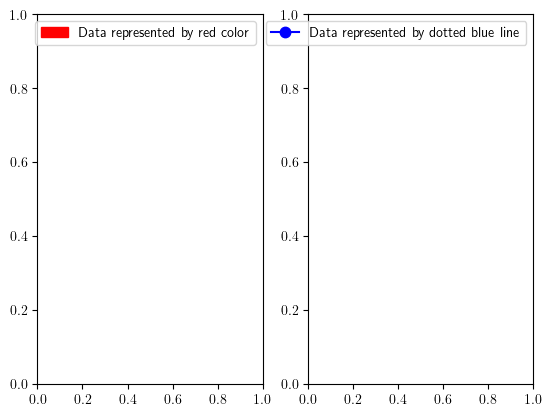

In [11]:
fig, [ax00, ax01] = plt.subplots(1, 2)

# Say, we wanted to create a legend which has an entry for some data which is represented by red color
# We can do that with matplotlib patches
import matplotlib.patches as mpatches

red_patch = mpatches.Patch(color="red", label="Data represented by red color")

# Or, say we have a line plot with color = blue and marker = '.' but we can't add that artist as a legend
# What we can do is we can define a proxy artist with matplotlib lines
import matplotlib.lines as mlines

proxy_line = mlines.Line2D([], [], color="b", marker=".", markersize=15)

# Now let's show these legends on two different empty axes's to show that legend handles
# don't actually have to exist on the figure to be added
ax00.legend(handles=[red_patch])
ax01.legend(handles=[proxy_line], labels=["Data represented by dotted blue line"])

plt.show()